In [65]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from scipy.stats import stats
import seaborn as sns

In [3]:
# Read CSV File 
# Cite Data Source""
file = "vgsales.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")

In [4]:
#read the data frame
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Data Overview for any cleanup requirements
df.count()

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

FINDINGS #1. Year column has 271 entries with N/A
          #2. Publisher column has 58 entries with N/A

In [6]:
# Cleaned data set
df = df.dropna(how='any')
df.count()

Rank            16291
Name            16291
Platform        16291
Year            16291
Genre           16291
Publisher       16291
NA_Sales        16291
EU_Sales        16291
JP_Sales        16291
Other_Sales     16291
Global_Sales    16291
dtype: int64

In [7]:
# Data types 
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
# statistical overview
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
#count of uniques platforms
count_platforms = df["Platform"].value_counts()
count_platforms 

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

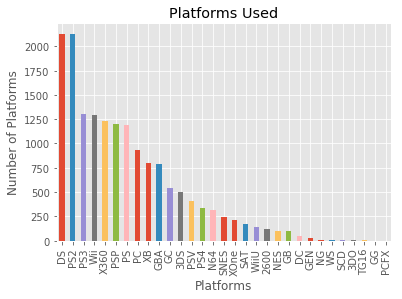

<Figure size 432x288 with 0 Axes>

In [45]:
ct_platforms = count_platforms.plot(kind='bar')


ct_platforms.set_title("Platforms Used")
ct_platforms.set_xlabel("Platforms")
ct_platforms.set_ylabel("Number of Platforms")

plt.show()
plt.tight_layout()
plt.savefig("platforms.png")

In [13]:
#count by genres
count_genres = df["Genre"].value_counts()
count_genres 

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

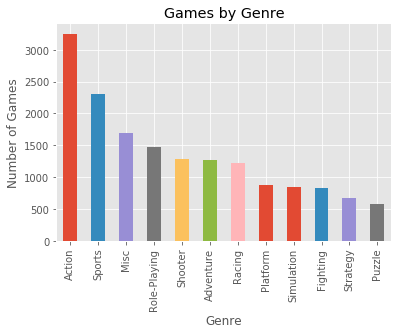

<Figure size 432x288 with 0 Axes>

In [44]:
ct_genres = count_genres.plot(kind='bar')

ct_genres.set_title("Games by Genre")
ct_genres.set_xlabel("Genre")
ct_genres.set_ylabel("Number of Games")

plt.show()
plt.tight_layout()
plt.savefig("Games_by_Genre.png")

In [14]:
#count of uniques publishers
count_publisher = df["Publisher"].value_counts()
count_publisher

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

In [15]:
# General Obervations
# sales for the regions 

average_sales_NA = df["NA_Sales"].mean()
average_sales_EU = df["EU_Sales"].mean()
average_sales_JP = df["JP_Sales"].mean()
average_sales_Oth = df["Other_Sales"].mean()
average_sales_Global = df["Global_Sales"].mean()

 
total_sales_NA = df["NA_Sales"].sum()
total_sales_EU = df["EU_Sales"].sum()
total_sales_JP = df["JP_Sales"].sum()
total_sales_Oth = df["Other_Sales"].sum()
total_sales_Global = df["Global_Sales"].sum()


number_sales=df["Global_Sales"].count()
item_count = len(df["Name"].unique())

# DataFrame to hold results
summary_table = pd.DataFrame({"Number of Unique Items": [item_count],
                              "Total Sales NA": [total_sales_NA],
                              "Total Sales EU": [total_sales_EU],
                              "Total Sales JP": [total_sales_JP],
                              "Total Sales Oth": [total_sales_Oth],
                              "Total Sales Global": [total_sales_Global],
                              "Average Sales NA": [average_sales_NA],
                              "Average Sales EU": [average_sales_EU],
                              "Average Sales JP": [average_sales_JP],
                              "Average Sales Oth": [average_sales_Oth],
                              "Average Sales Global": [average_sales_Global],
                              "Total Sales Number": [number_sales]})

 
summary_table = summary_table.round(2)

# Display the summary_table
summary_table


,Number of Unique Items,Total Sales NA,Total Sales EU,Total Sales JP,Total Sales Oth,Total Sales Global,Average Sales NA,Average Sales EU,Average Sales JP,Average Sales Oth,Average Sales Global,Total Sales Number
0,11325,4327.65,2406.69,1284.27,788.91,8811.97,0.27,0.15,0.08,0.05,0.54,16291


In [16]:
#sales share by region 
NA_per = total_sales_NA/total_sales_Global*100
EU_per = total_sales_EU/total_sales_Global*100  
JP_per = total_sales_JP/total_sales_Global*100  
oth_per = total_sales_Oth /total_sales_Global*100

Sales_dist_table = pd.DataFrame({"Percentage Sales NA": [NA_per],
                                 "Percentage Sales EU": [EU_per],
                                 "Percentage Sales JP": [JP_per],
                                 "Percentage Sales Oth": [oth_per]
                              })

 
Sales_dist_table = Sales_dist_table.round(2)

# Display the summary_table
Sales_dist_table



,Percentage Sales NA,Percentage Sales EU,Percentage Sales JP,Percentage Sales Oth
0,49.11,27.31,14.57,8.95


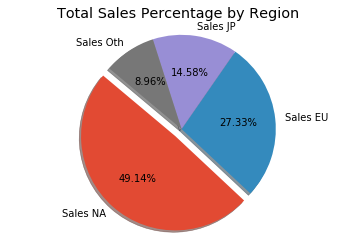

In [43]:
labels = ["Sales NA", "Sales EU", "Sales JP", "Sales Oth"]

# The values of each section of the pie chart
sizes = [49.11, 27.31, 14.57, 8.95]

explode = (0.1, 0, 0, 0)
plt.title("Total Sales Percentage by Region")
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("total_sales_pie.png")

<Figure size 432x288 with 0 Axes>

Obervations 
1. Total Sales are highest in NA followed by EU, JP and Others
2. We can make a pie chart of sales share

In [104]:
# Sales Trends by regions
by_year = df.groupby("Year")

sales_by_year = by_year["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].sum()
sales_by_year = pd.DataFrame(sales_by_year).reset_index()
sales_by_year = sales_by_year.sort_values('Global_Sales',ascending = False) 
 

sales_by_year


,Year,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
28,2008.0,678.90,351.44,184.40,60.26,82.39
29,2009.0,667.30,338.85,191.59,61.89,74.77
27,2007.0,609.92,311.18,160.18,60.29,77.58
30,2010.0,600.29,304.24,176.57,59.49,59.90
26,2006.0,521.04,263.12,129.24,73.73,54.43
31,2011.0,515.80,241.00,167.31,53.04,54.39
25,2005.0,458.51,241.58,121.56,54.28,40.55
24,2004.0,414.01,218.80,105.92,41.65,47.24
22,2002.0,395.52,216.19,109.74,41.76,27.28
33,2013.0,368.11,154.77,125.80,47.59,39.82


Text(0.5,0.98,'Total North American Sales by Year')

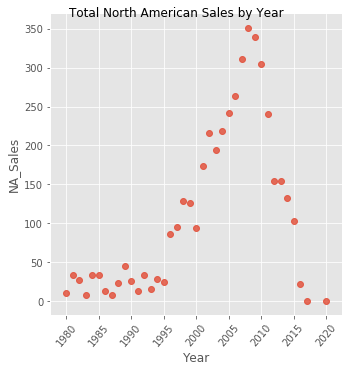

In [106]:
yr = sns.lmplot('Year', 'NA_Sales', data=sales_by_year, fit_reg=False)

yr.set_xticklabels(rotation=50)
yr.fig.suptitle('Total North American Sales by Year')

We can do a trend analysis (Line graph for regional sales) for each region

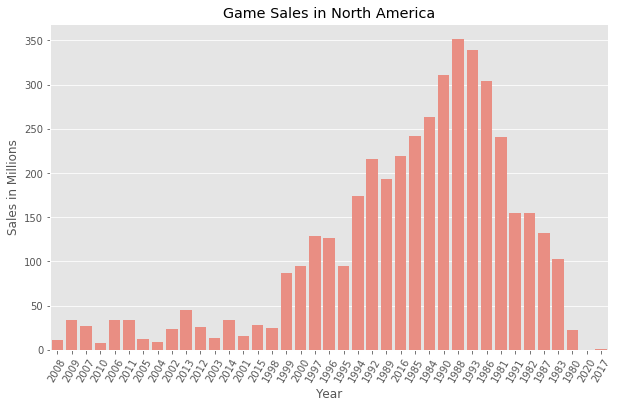

In [77]:

y = sales_by_year['NA_Sales']
x = y.index.astype(int)

plt.figure(figsize=(10,6))
ax = sns.barplot(y = y, x = x, color="salmon")
ax.set_xlabel(xlabel='Year')
ax.set_xticklabels(labels = x, rotation=60)
ax.set_ylabel(ylabel='Sales in Millions')
ax.set_title(label='Game Sales in North America')
plt.show()

In [18]:
# Sales by publisher for regions
by_pub = df.groupby("Publisher")

sales_by_pub = by_pub["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].sum()

sales_by_pub = pd.DataFrame(sales_by_pub)
sales_by_pub = sales_by_pub.sort_values('Global_Sales',ascending = False)

sales_by_pub



,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,,
Nintendo,1784.43,815.75,418.30,454.99,95.19
Electronic Arts,1093.39,584.22,367.38,13.98,127.63
Activision,721.41,426.01,213.72,6.54,74.79
Sony Computer Entertainment,607.28,265.22,187.55,74.10,80.40
Ubisoft,473.54,252.81,163.03,7.33,50.16
Take-Two Interactive,399.30,220.47,117.95,5.83,55.20
THQ,340.44,208.60,94.60,5.01,32.11
Konami Digital Entertainment,278.56,88.91,68.62,90.93,29.91
Sega,270.70,108.78,81.41,56.19,24.30


We can have a analysis by region for the publisher type (top 5 or top 10)

In [84]:
# Sales by Genre for regions
by_genre = df.groupby("Genre")

sales_by_genre = by_genre["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" ].sum()

sales_by_genre = pd.DataFrame(sales_by_genre).reset_index()

sales_by_genre = sales_by_genre.sort_values('Global_Sales',ascending = False)

sales_by_genre.index

Int64Index([0, 10, 8, 7, 4, 3, 6, 2, 9, 5, 1, 11], dtype='int64')

In [85]:
sales_by_genre.columns

Index(['Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales'],
      dtype='object')

Text(0.5,0.98,'Global Sales by Genre')

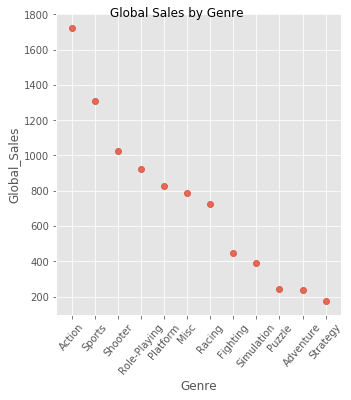

In [98]:
g = sns.lmplot('Genre', 'Global_Sales', data=sales_by_genre, fit_reg=False)

g.set_xticklabels(rotation=50)
g.fig.suptitle('Global Sales by Genre')

Text(0.5,0.98,'North American Sales by Genre')

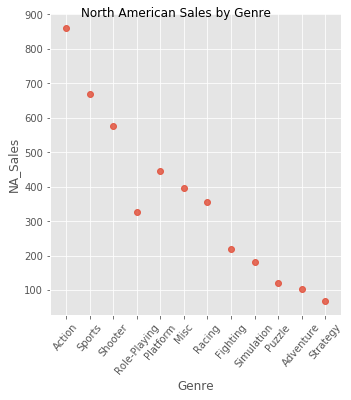

In [103]:
n = sns.lmplot('Genre', 'NA_Sales', data=sales_by_genre, fit_reg=False)

n.set_xticklabels(rotation=50)
n.fig.suptitle('North American Sales by Genre')

In [20]:
# Sales by Platform for regions
by_platform = df.groupby("Platform")

sales_by_platform = by_platform["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" ].sum()

sales_by_platform = pd.DataFrame(sales_by_platform)

sales_by_platform = sales_by_platform.sort_values('Global_Sales',ascending = False)

sales_by_platform

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,,
PS2,1233.46,572.92,332.63,137.54,190.47
X360,969.60,594.33,278.00,12.30,84.67
PS3,949.35,388.90,340.47,79.21,140.81
Wii,909.81,497.37,264.35,68.28,79.20
DS,818.91,388.53,194.05,175.02,60.29
PS,727.39,334.71,212.38,139.78,40.69
GBA,305.62,178.43,72.49,46.56,7.51
PSP,291.71,107.09,67.16,75.89,41.52
PS4,278.10,96.80,123.70,14.30,43.36


In [21]:
# Sales by Name for regions
by_name = df.groupby("Name")

sales_by_name = by_name["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" ].sum()

sales_by_name = pd.DataFrame(sales_by_name)

sales_by_name= sales_by_name.sort_values('Global_Sales',ascending = False)

sales_by_name

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,
Wii Sports,82.74,41.49,29.02,3.77,8.46
Grand Theft Auto V,55.92,23.46,23.04,1.39,8.03
Super Mario Bros.,45.31,32.48,4.88,6.96,0.99
Tetris,35.84,26.17,2.95,6.03,0.69
Mario Kart Wii,35.82,15.85,12.88,3.79,3.31
Wii Sports Resort,33.00,15.75,11.01,3.28,2.96
Pokemon Red/Pokemon Blue,31.37,11.27,8.89,10.22,1.00
Call of Duty: Modern Warfare 3,30.83,15.58,11.29,0.62,3.35
New Super Mario Bros.,30.01,11.38,9.23,6.50,2.90
